In [1]:
import numpy as np
import keras
from keras import layers


In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


NameError: name 'keras' is not defined

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15


422/422 [==============================] - 14s 31ms/step - loss: 0.3584 - accuracy: 0.8917 - val_loss: 0.0834 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 14s 34ms/step - loss: 0.1115 - accuracy: 0.9653 - val_loss: 0.0577 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0857 - accuracy: 0.9732 - val_loss: 0.0459 - val_accuracy: 0.9885
Epoch 4/15
422/422 [==============================] - 13s 32ms/step - loss: 0.0718 - accuracy: 0.9785 - val_loss: 0.0427 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 14s 32ms/step - loss: 0.0635 - accuracy: 0.9804 - val_loss: 0.0363 - val_accuracy: 0.9908
Epoch 6/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0583 - accuracy: 0.9824 - val_loss: 0.0380 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0536 - accuracy: 0.9835 - val_loss: 0.0343 - val_accura

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025465648621320724
Test accuracy: 0.991599977016449


313/313 [==============================] - 1s 4ms/step


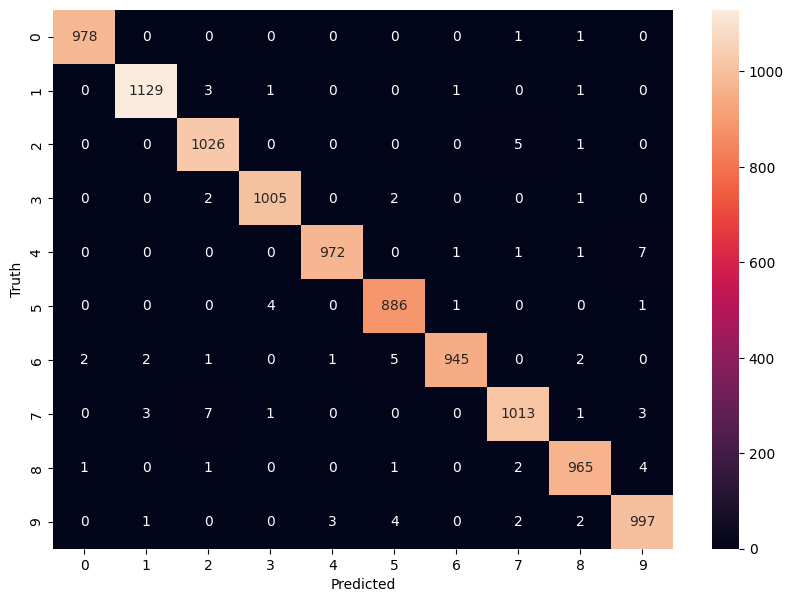

In [7]:
from sklearn.metrics import confusion_matrix

# Assuming x_test and y_test are your test data and labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()